In [1]:
!pip install opencv-python matplotlib

In [2]:
!pip install -U scikit-learn

In [3]:
import tensorflow as tf

In [4]:
from numpy import mean
from numpy import std

In [5]:
from tensorflow import keras

In [6]:
from sklearn.model_selection import KFold

In [7]:
print(tf.keras.__version__)

2.9.0


# Preprocessing

In [8]:
mnist = keras.datasets.mnist

In [9]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [10]:
x_train.size

47040000

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

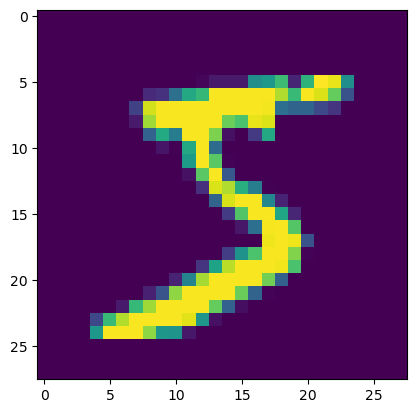

In [14]:
plt.imshow(x_train[0])

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
y_train.shape

(60000,)

In [17]:
y_train[0]

5

##### x_train   and    x_train    ->       are images of size 28x28

##### y_train   and    y_train    ->       are labels indicating the actual numbers in the images

In [18]:
# # 28 x 28 = 784
# reshape = 784
# trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))

In [19]:
x_train = x_train.reshape((x_train.shape[0], 28, 28 , 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28 , 1))

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [22]:
x_test.shape

(10000, 28, 28, 1)

In [23]:
x_test[0][0]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [25]:
x_train[0][0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [26]:
x_train/=255.0
x_test/=255.0

In [27]:
x_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [28]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Model

In [29]:
from tensorflow.keras.layers import Dense, Layer, Conv2D, MaxPooling2D, Input, Flatten, Dropout, Softmax
from tensorflow.keras import Sequential
import tensorflow as tf

In [30]:
def def_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu' , input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
    
    opt = SGD(lr=0.01)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [31]:
def train(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_idx, test_idx in kfold.split(dataX):
        model = def_model()
        trainData, trainLabel, testData, testLabel = dataX[train_idx], dataY[train_idx], dataX[test_idx], dataY[test_idx]
        history = model.fit(trainData, trainLabel, epochs=10, batch_size=32, validation_data=(testData,testLabel), verbose=0)
        _, acc = model.evaluate(testData,testLabel, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    model.save('handwrittenDigitRecognition.h5')
    return scores, histories

## plotting the model performance

In [32]:
def plot_results(histories):
    for i in range(len(histories)):
        
        plt.subplot(2,1,1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange' , label= 'test')
        
        plt.subplot(2,1,2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        plt.show()
        

In [33]:
def performance_summary(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    plt.boxplot(scores)
    plt.show()

In [34]:
def run_test_harness():
    #  dataset->  x_train, y_train, x_test, y_test
    #  evaluate model
    scores, histories = train(x_train, y_train)
    # learning curves
    plot_results(histories)
    # summarize estimated performance
    performance_summary(scores)

In [35]:
from keras.optimizers import SGD, Adam

Metal device set to: Apple M1


2023-01-31 19:59:17.370617: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-31 19:59:17.370969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/gryffindorgirl/miniconda/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2023-01-31 19:59:17.585680: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-31 19:59:17.739519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin op

> 98.242


2023-01-31 20:01:46.572820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 20:01:59.563277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


> 98.200


2023-01-31 20:04:18.136886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 20:04:31.224020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


> 98.192


2023-01-31 20:06:50.176072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 20:07:03.168256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


> 97.892


2023-01-31 20:09:21.704204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 20:09:34.695863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


> 98.242


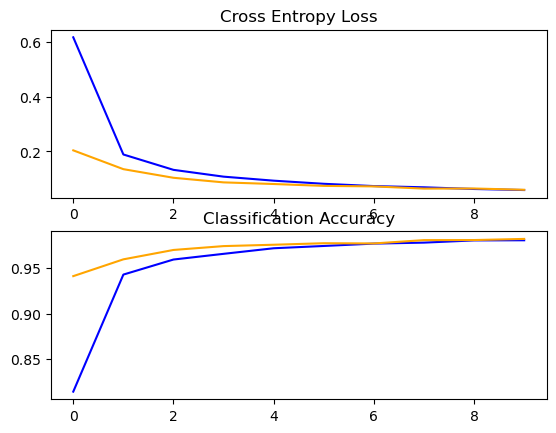

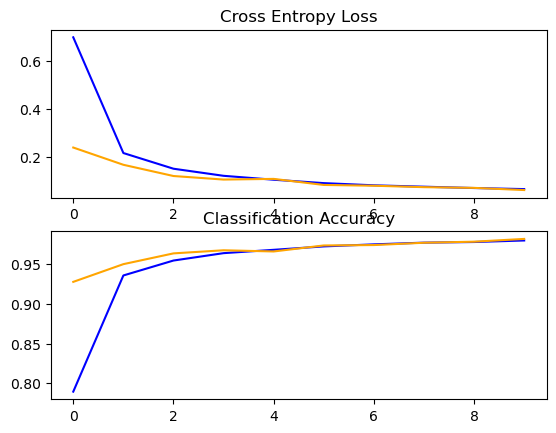

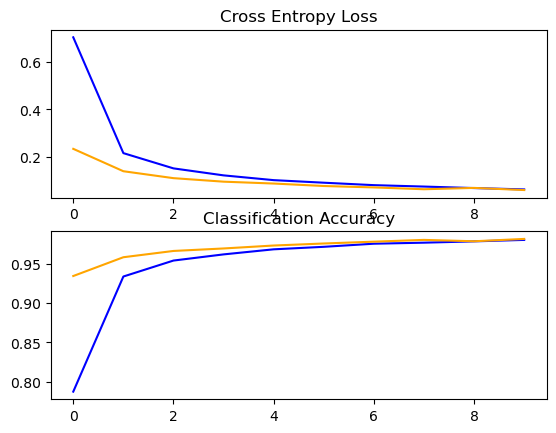

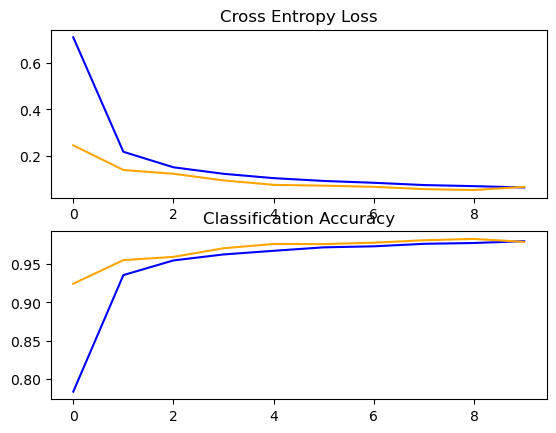

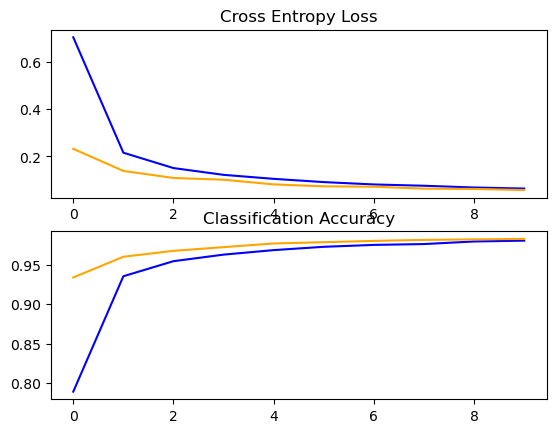

Accuracy: mean=98.153 std=0.132, n=5


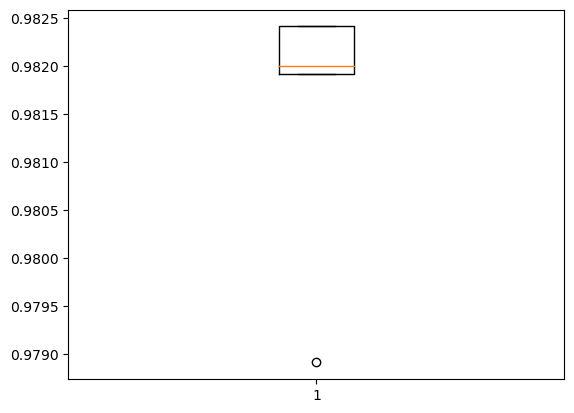

In [36]:
run_test_harness()

## Loading the saved model

In [45]:
model = keras.models.load_model('handwrittenDigitRecognition.h5')

## making predictions

In [48]:
x_test[0].shape

(28, 28, 1)

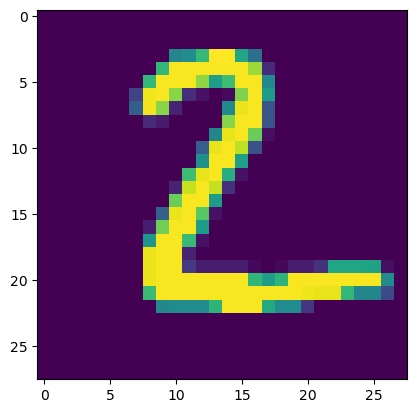

In [74]:
plt.imshow(x_test[1])

In [61]:
def load_image(img):
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [56]:
mnist = keras.datasets.mnist

In [58]:
(trainData, trainLabel) , (testData, testLabel) = mnist.load_data()

In [75]:
testData[1].shape

(28, 28)

In [76]:
testImage = load_image(testData[1])

In [77]:
testImage.shape

(1, 28, 28, 1)

In [78]:
from numpy import argmax

In [79]:
prediction = model.predict(testImage)

1/1 [==============================] - 0s 16ms/step


In [80]:
prediction = argmax(prediction)

In [81]:
prediction

2